<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-15-m-1-r5.csv?token=AKVFSOHTZOIBYVKDMUYCV5K62AY4A')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-15-m-11-r5.csv?token=AKVFSOC36H5WCULH623GGMC62AY4C')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-4-m-1-r5.csv?token=AKVFSOBV7IDM7TOPTN6MU3C62AY6Q')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-4-m-11-r5.csv?token=AKVFSOHKHKZ5SYV3QM5JXLK62AY6U')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-6-m-1-r5.csv?token=AKVFSOAI43AIMENIKMMQFGC62AZAG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-6-m-11-r5.csv?token=AKVFSOF7N6DIHOLVSTONNLC62AZAI')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-9-m-1-r5.csv?token=AKVFSOBGNPNSTQCUDOOGVTC62AZC2')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-9-m-11-r5.csv?token=AKVFSOB4AIE2VBP6VSVO6J262AZC2')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOA3ZU2YIMUWQYSPOAK62AZEU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-normal-n-0-4-r5.csv?token=AKVFSOCJQ6ICF5TQNA2D4CS62AZEW')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-normal-n-0-6-r5.csv?token=AKVFSOFIWEKELRHE2OP6MIS62AZE2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-normal-n-0-9-r5.csv?token=AKVFSOBALJ6PGVFWQJV5FRS62AZE6')

df1['target'] = 0
df2['target'] = 0
df3['target'] = 0
df4['target'] = 0
df5['target'] = 0
df6['target'] = 0
df7['target'] = 0
df8['target'] = 0

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(73806, 30)
(52701, 30)
(90606, 30)
(69643, 30)
(83817, 30)
(62955, 30)
(82090, 30)
(60712, 30)
(34357, 30)
(51024, 30)
(44745, 30)
(42660, 30)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,11,1,11,11,121,8,1,4,8,3,27,9,1
1,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,6,1,6,6,36,8,1,4,8,3,27,9,0
2,11,2,4,1,1,4,3,9,4,4,23,7,3,3,1,0.333333,8,11,1,11,11,121,8,1,4,12,3,27,9,0
3,66,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,10,1,10,10,100,6,4,4,8,20,85,100,0
4,66,1,2,4,1,1,5,17,23,7,9,9,2,3,2,0.666667,12,10,1,10,10,100,2,4,4,8,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,3276597,2,4,4,2,2,5,17,20,4,15,15,30092,5,1,0.200000,9,1,1,1,1,1,8,8,16,481472,20,85,100,0
749112,3276598,2,4,4,3,2,5,17,20,4,15,15,30092,5,1,0.200000,10,1,1,1,1,1,8,12,24,722208,20,85,100,0
749113,3276599,2,4,4,4,2,5,17,20,4,15,15,30092,5,1,0.200000,11,1,1,1,1,1,8,16,32,962944,20,85,100,0
749114,3276600,2,4,3,1,4,3,9,20,4,18,2,30092,3,1,0.333333,12,1,1,1,1,1,8,3,12,361104,9,27,27,0


In [0]:
df.shape

(749116, 30)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-15-m-12-r5.csv?token=AKVFSOGBACKZVIHGDQFMUMK62AZIU')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-15-m-7-r5.csv?token=AKVFSOB5PDKV5JP7ER3SYFS62AY4I')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-4-m-12-r5.csv?token=AKVFSOAHOMC7CQXA7UMWTS262AZK2')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-4-m-7-r5.csv?token=AKVFSOGGE4Z5EW6YWCRNBAS62AZLU')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-6-m-12-r5.csv?token=AKVFSOE5L6BQUDJMN7ZJCJC62AZMQ')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-6-m-7-r5.csv?token=AKVFSOCYY7KDTSS5DJ2K6VC62AZMU')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-9-m-12-r5.csv?token=AKVFSOEBCZVQINSRCJVUZOK62AZN2')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%203/fetch-router/r5/2-fft-malicious-n-0-9-m-7-r5.csv?token=AKVFSOE3LQNC74GV77BH7P262AZN4')

In [0]:
df13['target'] = 0
df14['target'] = 0
df15['target'] = 0
df16['target'] = 0
df17['target'] = 0
df18['target'] = 0
df19['target'] = 0
df20['target'] = 0

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(50255, 30)
(62551, 30)
(67123, 30)
(79857, 30)
(60189, 30)
(73065, 30)
(58244, 30)
(70972, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,80,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,6,1,6,6,36,6,4,4,8,20,85,100,0
1,81,4,2,1,1,4,3,9,6,6,24,8,4,3,1,0.333333,9,5,2,6,10,60,8,1,4,16,3,27,9,0
2,82,3,2,4,2,2,5,17,23,7,1,1,2,3,2,0.666667,14,4,3,6,12,72,6,8,16,32,20,85,100,0
3,83,3,2,4,3,2,5,17,23,7,1,1,2,3,2,0.666667,15,3,4,6,12,72,6,12,24,48,20,85,100,0
4,84,3,2,4,4,2,5,17,23,7,1,1,2,3,2,0.666667,16,2,5,6,10,60,6,16,32,64,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83812,3266199,4,2,4,1,1,5,17,23,7,0,0,30088,4,2,0.500000,13,1,1,1,1,1,8,4,4,120352,20,85,100,0
83813,3266200,4,2,4,2,2,5,17,23,7,0,0,30088,4,2,0.500000,14,1,1,1,1,1,8,8,16,481408,20,85,100,0
83814,3266201,4,2,4,3,2,5,17,23,7,0,0,30088,4,2,0.500000,15,3,1,3,3,9,8,12,24,722112,20,85,100,0
83815,3266202,4,2,4,4,2,5,17,23,7,0,0,30088,4,2,0.500000,16,2,2,3,4,12,8,16,32,962816,20,85,100,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.250595,-0.020307,0.014424,-0.021815,0.340908,0.339830,-0.007235,0.303156,0.155391,-0.166765,-0.206380,-0.047173,0.033343,-0.008929,-0.019892,-0.028363,0.536356,-0.041136,-0.023310,-0.022850,0.259028,0.341292,0.338342,-0.031782
inport,-0.250595,1.000000,-0.166390,-0.005833,0.008821,0.051282,0.005191,-0.059322,0.044429,-0.264342,-0.112474,-0.131291,-0.079779,-0.137064,-0.140006,-0.130263,-0.118824,0.638870,-0.052319,-0.051697,-0.066931,-0.091503,0.032652,-0.010604,0.040022
cache_coherence_type,-0.020307,-0.166390,1.000000,0.209598,-0.316876,-0.224775,-0.237807,0.048404,-0.070167,-0.117661,-0.157311,-0.164176,0.077114,-0.022209,0.035450,0.038991,0.039673,-0.169434,0.447171,0.375629,0.287735,0.617290,-0.230618,0.148398,0.003071
flit_id,0.014424,-0.005833,0.209598,1.000000,-0.023656,0.242817,0.226803,0.010166,0.044851,0.037675,0.015172,0.390672,-0.063900,0.121259,0.037034,0.031917,0.019219,-0.002117,0.948467,0.900227,0.640279,0.363471,0.236881,0.325353,-0.010092
flit_type,-0.021815,0.008821,-0.316876,-0.023656,1.000000,-0.367106,-0.342895,-0.015373,-0.067812,-0.056962,-0.022938,0.330012,-0.098158,0.078671,-0.012582,-0.025984,-0.014261,0.003197,-0.076308,0.197564,0.140110,-0.549512,-0.358131,-0.491886,0.015247
vnet,0.340908,0.051282,-0.224775,0.242817,-0.367106,1.000000,0.990014,-0.017920,0.234116,0.218669,0.108782,-0.406800,-0.038364,0.032247,-0.003950,-0.013528,-0.031796,0.281612,0.045838,-0.012845,-0.025799,0.627852,0.998331,0.930265,-0.088140
vc,0.339830,0.005191,-0.237807,0.226803,-0.342895,0.990014,1.000000,-0.015337,0.209978,0.173770,0.058334,-0.390872,-0.033300,0.056046,0.014686,0.005022,-0.014275,0.245372,0.032175,-0.021574,-0.030953,0.609379,0.996490,0.915224,-0.089001
traversal_id,-0.007235,-0.059322,0.048404,0.010166,-0.015373,-0.017920,-0.015337,1.000000,0.004326,0.028547,0.019755,0.038240,0.091420,0.091474,0.118087,0.084227,0.060962,-0.058010,0.022953,0.018821,0.559500,0.024196,-0.016903,0.000039,-0.247690
hop_count,0.303156,0.044429,-0.070167,0.044851,-0.067812,0.234116,0.209978,0.004326,1.000000,0.465172,-0.136038,0.018915,-0.093561,-0.056757,-0.097054,-0.091999,-0.088757,0.224300,-0.012861,-0.017301,-0.011828,0.132977,0.224842,0.211185,-0.005178
current_hop,0.155391,-0.264342,-0.117661,0.037675,-0.056962,0.218669,0.173770,0.028547,0.465172,1.000000,0.741069,0.189759,-0.007705,-0.040632,-0.031209,-0.043935,-0.048614,-0.143052,-0.044158,-0.040061,-0.016872,0.082568,0.200913,0.177625,-0.054012


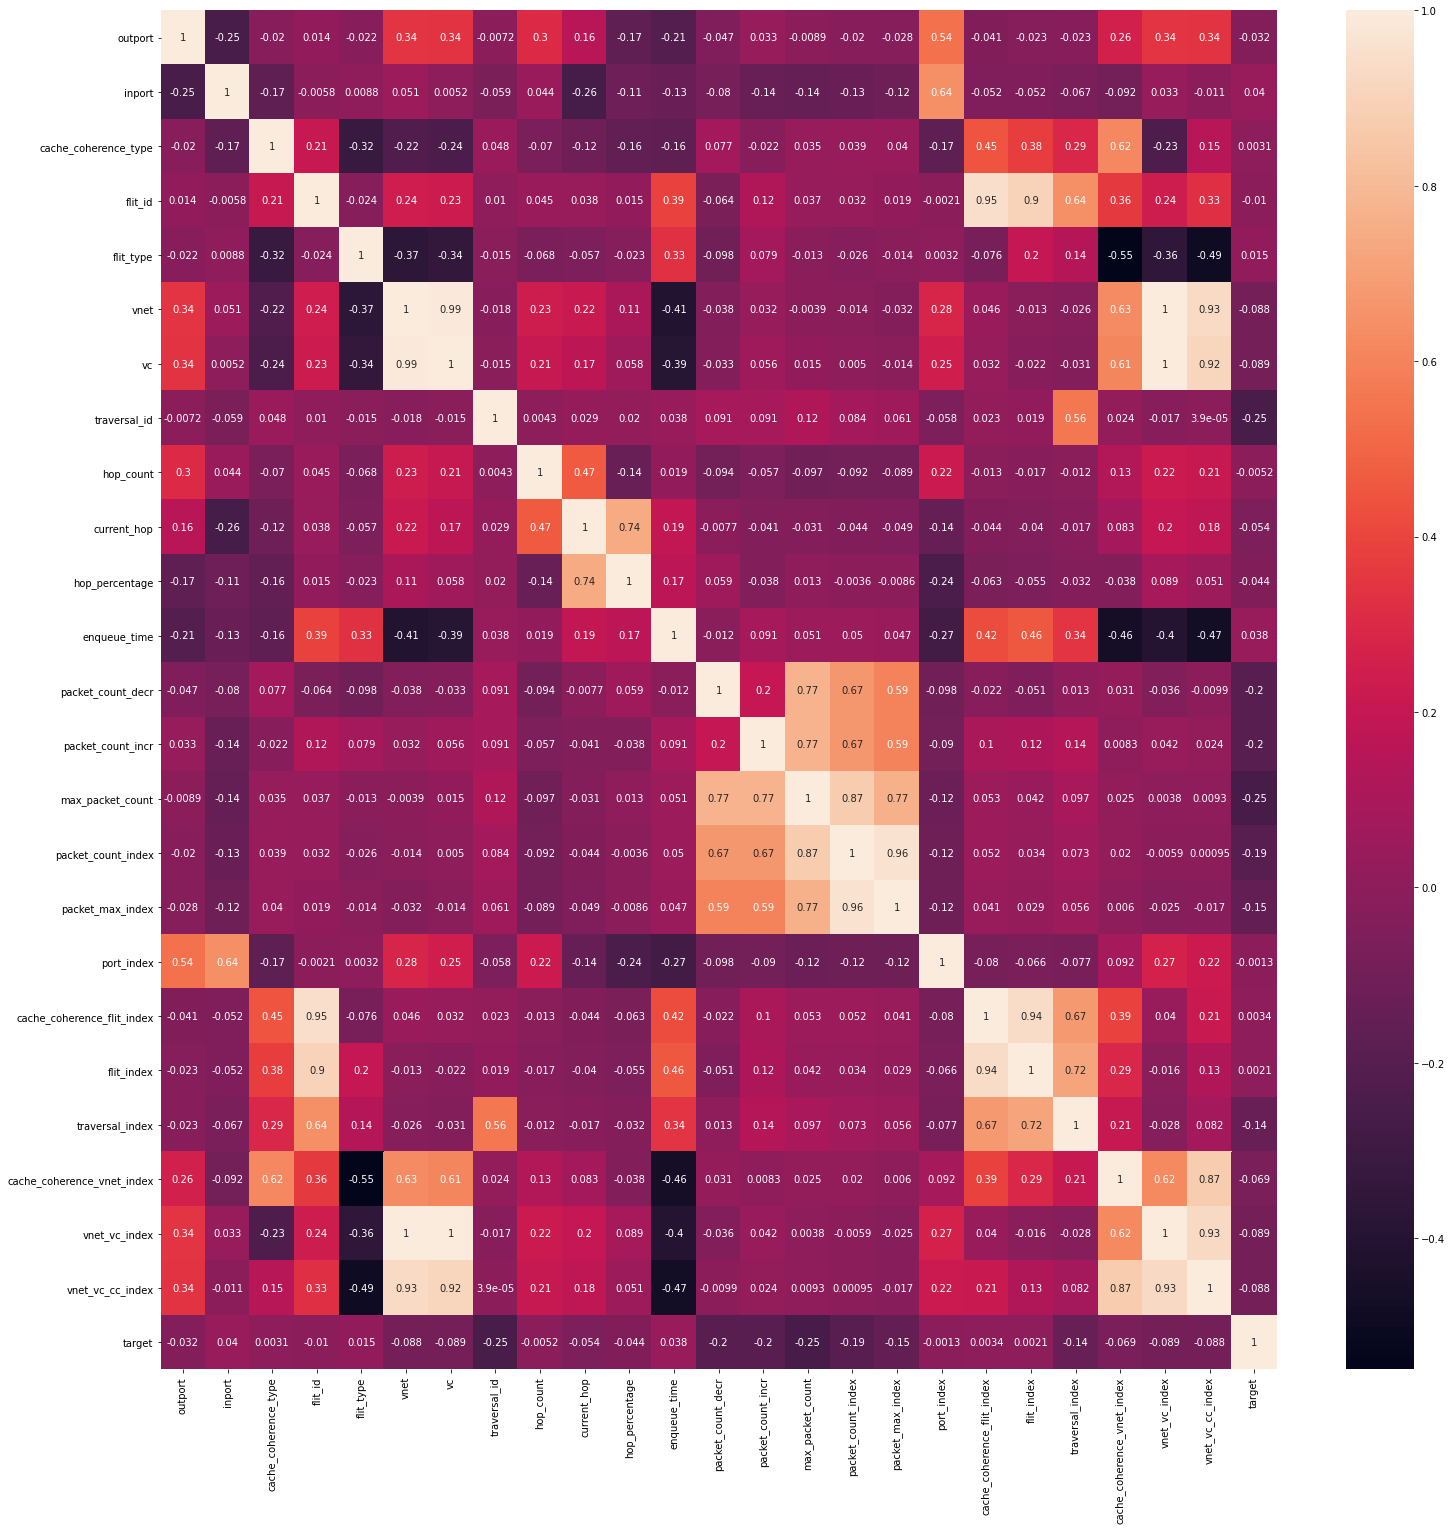

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,2,3,1,0.333333,8,11,1,11,11,121,8,1,4,8,3,27,9
1,2,4,1,1,4,3,9,2,3,1,0.333333,8,6,1,6,6,36,8,1,4,8,3,27,9
2,2,4,1,1,4,3,9,3,3,1,0.333333,8,11,1,11,11,121,8,1,4,12,3,27,9
3,3,2,4,1,1,5,17,2,3,2,0.666667,12,10,1,10,10,100,6,4,4,8,20,85,100
4,1,2,4,1,1,5,17,2,3,2,0.666667,12,10,1,10,10,100,2,4,4,8,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,2,4,4,2,2,5,17,30092,5,1,0.200000,9,1,1,1,1,1,8,8,16,481472,20,85,100
749112,2,4,4,3,2,5,17,30092,5,1,0.200000,10,1,1,1,1,1,8,12,24,722208,20,85,100
749113,2,4,4,4,2,5,17,30092,5,1,0.200000,11,1,1,1,1,1,8,16,32,962944,20,85,100
749114,2,4,3,1,4,3,9,30092,3,1,0.333333,12,1,1,1,1,1,8,3,12,361104,9,27,27


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.5,0.25,0.333333,0.065574,0.277778,0.0,0.277778,0.027778,0.008985,0.666667,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.5,0.25,0.333333,0.065574,0.138889,0.0,0.138889,0.013889,0.002621,0.666667,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.5,0.25,0.333333,0.065574,0.277778,0.0,0.277778,0.027778,0.008985,0.666667,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
3,0.75,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.5,0.50,0.666667,0.131148,0.250000,0.0,0.250000,0.025000,0.007412,0.500000,0.103448,0.000000,0.000001,0.944444,0.920635,1.000000
4,0.25,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000033,0.5,0.50,0.666667,0.131148,0.250000,0.0,0.250000,0.025000,0.007412,0.166667,0.103448,0.000000,0.000001,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,0.50,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.081967,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178007,0.944444,0.920635,1.000000
749112,0.50,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.098361,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267012,0.944444,0.920635,1.000000
749113,0.50,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.000000,1.0,0.25,0.200000,0.114754,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356016,0.944444,0.920635,1.000000
749114,0.50,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.5,0.25,0.333333,0.131148,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.133505,0.333333,0.000000,0.197802


In [0]:
train_X[train_X.duplicated()].shape

(25896, 24)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(18, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.0,0.666667,0.50,0.5,0.129032,0.148148,0.000000,0.148148,0.019139,0.004082,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.0
1,1.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.145161,0.111111,0.037037,0.148148,0.033493,0.006634,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.0
2,1.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.161290,0.074074,0.074074,0.148148,0.038278,0.007484,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.0
3,1.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.0,0.666667,0.50,0.5,0.177419,0.037037,0.111111,0.148148,0.033493,0.006634,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.0
4,1.0,0.5,0.5,1.00,0.666667,1.0,0.888889,0.0,0.666667,0.50,0.5,0.241935,0.000000,0.148148,0.148148,0.019139,0.004082,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50250,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,1.0,1.000000,0.25,0.2,0.080645,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.044501,0.944444,0.920635,1.0
50251,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.096774,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178007,0.944444,0.920635,1.0
50252,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.112903,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.267012,0.944444,0.920635,1.0
50253,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,1.0,1.000000,0.25,0.2,0.129032,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.356016,0.944444,0.920635,1.0


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(39, 24)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(34, 24)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(52, 24)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(46, 24)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(60, 24)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(28, 24)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(48, 24)


In [0]:
test_X8 = test_X[:30000]
test_X9 = test_X1[:30000]
test_X10  = test_X2[:30000]
test_X11  = test_X3[:30000]
test_X12  = test_X4[:30000]
test_X13  = test_X5[:30000]
test_X14  = test_X6[:30000]
test_X15  = test_X7[:30000]

test_Y8 = test_Y[:30000]
test_Y9 = test_Y1[:30000]
test_Y10  = test_Y2[:30000]
test_Y11  = test_Y3[:30000]
test_Y12  = test_Y4[:30000]
test_Y13  = test_Y5[:30000]
test_Y14  = test_Y6[:30000]
test_Y15  = test_Y7[:30000]

test_X8

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.129032,0.148148,0.000000,0.148148,0.019139,0.004082,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.145161,0.111111,0.037037,0.148148,0.033493,0.006634,0.666667,0.241379,0.139535,0.000004,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.161290,0.074074,0.074074,0.148148,0.038278,0.007484,0.666667,0.379310,0.232558,0.000007,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.177419,0.037037,0.111111,0.148148,0.033493,0.006634,0.666667,0.517241,0.325581,0.000010,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.241935,0.000000,0.148148,0.148148,0.019139,0.004082,0.666667,0.655172,0.651163,0.000021,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.557994,0.666667,0.5,0.5,0.145161,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.099329,0.944444,0.920635,1.000000
29996,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.557994,0.666667,0.5,0.5,0.161290,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.148994,0.944444,0.920635,1.000000
29997,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.557994,0.666667,0.5,0.5,0.177419,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.198660,0.944444,0.920635,1.000000
29998,0.0,0.5,0.333333,0.00,1.000000,0.0,0.000000,0.557994,0.000000,0.5,1.0,0.193548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.093023,0.074496,0.333333,0.000000,0.197802


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    576330
1    172786
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
14            max_packet_count  7649.956620
7                 traversal_id  6150.023835
12           packet_count_decr  3830.870311
13           packet_count_incr  3819.092157
5                         vnet  2733.633160
15          packet_count_index  2644.436921
22               vnet_vc_index  2419.298803
6                           vc  2205.250708
20             traversal_index  1846.237715
16            packet_max_index  1335.511440
23            vnet_vc_cc_index   884.864308
21  cache_coherence_vnet_index   282.250680
9                  current_hop   185.465589
1                       inport   157.880802
10              hop_percentage   132.336715
11                enqueue_time   101.298212
0                      outport    89.321641


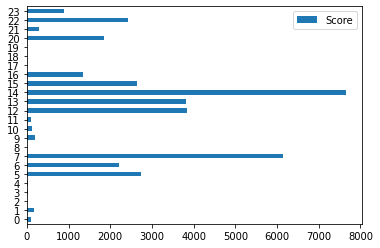

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 77.46073700299686
Test Prediction  77.43952904741563


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X7)
logreg_score_test = accuracy_score(test_Y7,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  96.82419659735349
Test Prediction  97.08717686367923
Test Prediction  95.34883720930233
Test Prediction  99.13094656698848
Test Prediction  96.81503264716143
Test Prediction  99.19249982891945
Test Prediction  97.45553190028158
Test Prediction  98.22183396268952


In [0]:
y_pred_test = logreg.predict(test_X8)
logreg_score_test = accuracy_score(test_Y8,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X9)
logreg_score_test = accuracy_score(test_Y9,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X10)
logreg_score_test = accuracy_score(test_Y10,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X11)
logreg_score_test = accuracy_score(test_Y11,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X12)
logreg_score_test = accuracy_score(test_Y12,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X13)
logreg_score_test = accuracy_score(test_Y13,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X14)
logreg_score_test = accuracy_score(test_Y14,y_pred_test)
print("Test Prediction ",logreg_score_test*100)
y_pred_test = logreg.predict(test_X15)
logreg_score_test = accuracy_score(test_Y15,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  94.67999999999999
Test Prediction  93.92666666666668
Test Prediction  89.59333333333333
Test Prediction  97.72333333333333
Test Prediction  93.61333333333334
Test Prediction  98.03333333333333
Test Prediction  95.06333333333333
Test Prediction  95.79333333333334


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,2.040687
16,packet_max_index,1.772202
0,outport,1.615120
1,inport,1.243609
6,vc,0.933765
10,hop_percentage,0.872267
8,hop_count,0.642039
11,enqueue_time,0.469268
2,cache_coherence_type,0.223960
3,flit_id,0.120754


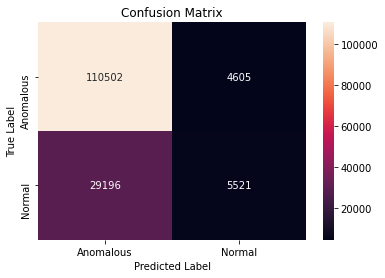

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87    115107
           1       0.55      0.16      0.25     34717

    accuracy                           0.77    149824
   macro avg       0.67      0.56      0.56    149824
weighted avg       0.73      0.77      0.72    149824



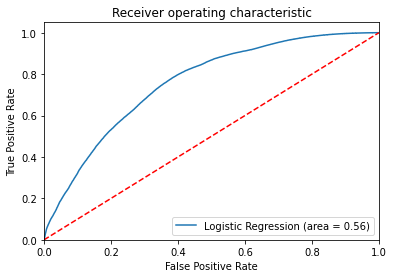

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

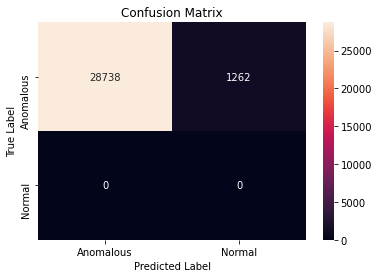

In [0]:
cm = confusion_matrix(test_Y15, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.96     30000
   macro avg       0.50      0.48      0.49     30000
weighted avg       1.00      0.96      0.98     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.15905435080062
Test Prediction  85.30876228107647


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X7)
knn_score_test = accuracy_score(test_Y7,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  82.91513282260472
Test Prediction  87.33353583475883
Test Prediction  86.62306511925868
Test Prediction  91.57368796724144
Test Prediction  86.28985362773929
Test Prediction  91.0312735235749
Test Prediction  87.09738342146831
Test Prediction  90.75269120216424


In [0]:
y_pred_knn_test= knn.predict(test_X8)
knn_score_test = accuracy_score(test_Y8,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X9)
knn_score_test = accuracy_score(test_Y9,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X10)
knn_score_test = accuracy_score(test_Y10,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X11)
knn_score_test = accuracy_score(test_Y11,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X12)
knn_score_test = accuracy_score(test_Y12,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X13)
knn_score_test = accuracy_score(test_Y13,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X14)
knn_score_test = accuracy_score(test_Y14,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)
y_pred_knn_test= knn.predict(test_X15)
knn_score_test = accuracy_score(test_Y15,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  74.89333333333333
Test Prediction  82.04666666666667
Test Prediction  80.30000000000001
Test Prediction  87.70666666666666
Test Prediction  79.84666666666666
Test Prediction  86.27333333333334
Test Prediction  81.36333333333333
Test Prediction  86.41666666666666


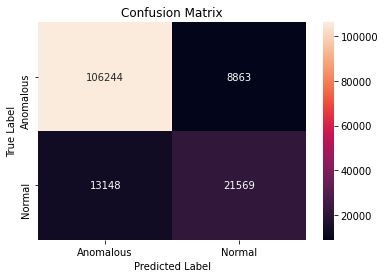

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91    115107
           1       0.71      0.62      0.66     34717

    accuracy                           0.85    149824
   macro avg       0.80      0.77      0.78    149824
weighted avg       0.85      0.85      0.85    149824



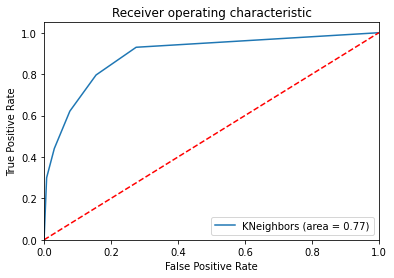

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

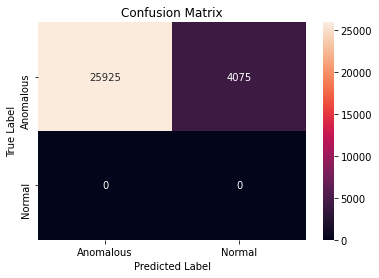

In [0]:
cm = confusion_matrix(test_Y15, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y15,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.86     30000
   macro avg       0.50      0.43      0.46     30000
weighted avg       1.00      0.86      0.93     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 60.379748102761255
Test Prediction Score 60.594430798803934


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X7)
nb_score_test = accuracy_score(test_Y7,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 44.2523132026664
Test Prediction  46.506051062333135
Test Prediction  50.164623154507396
Test Prediction  58.14518451732472
Test Prediction  49.65857548721527
Test Prediction  55.13036337507698
Test Prediction  52.05171348121696
Test Prediction  52.59538973116159


In [0]:
y_pred_nb_test= nb.predict(test_X8)
nb_score_test = accuracy_score(test_Y8,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X9)
nb_score_test = accuracy_score(test_Y9,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X10)
nb_score_test = accuracy_score(test_Y10,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X11)
nb_score_test = accuracy_score(test_Y11,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X12)
nb_score_test = accuracy_score(test_Y12,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X13)
nb_score_test = accuracy_score(test_Y13,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X14)
nb_score_test = accuracy_score(test_Y14,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)
y_pred_nb_test= nb.predict(test_X15)
nb_score_test = accuracy_score(test_Y15,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction Score 29.326666666666668
Test Prediction  25.293333333333333
Test Prediction  29.543333333333333
Test Prediction  34.63333333333333
Test Prediction  31.503333333333334
Test Prediction  30.383333333333333
Test Prediction  34.35666666666667
Test Prediction  29.360000000000003


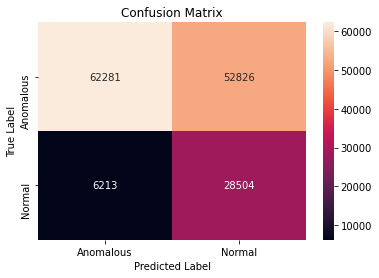

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68    115107
           1       0.35      0.82      0.49     34717

    accuracy                           0.61    149824
   macro avg       0.63      0.68      0.58    149824
weighted avg       0.78      0.61      0.64    149824



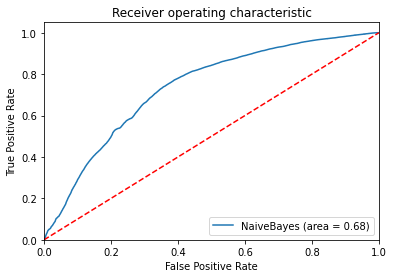

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 479433 samples, validate on 119859 samples
Epoch 1/15
479433/479433 [==============================] - 19s 39us/step - loss: 0.1522 - accuracy: 0.7732 - val_loss: 0.1460 - val_accuracy: 0.7822
Epoch 2/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1451 - accuracy: 0.7773 - val_loss: 0.1434 - val_accuracy: 0.7782
Epoch 3/15
479433/479433 [==============================] - 18s 37us/step - loss: 0.1437 - accuracy: 0.7781 - val_loss: 0.1427 - val_accuracy: 0.7778
Epoch 4/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1433 - accuracy: 0.7783 - val_loss: 0.1424 - val_accuracy: 0.7787
Epoch 5/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1431 - accuracy: 0.7787 - val_loss: 0.1426 - val_accuracy: 0.7799
Epoch 6/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1431 - accuracy: 0.7789 - val_loss: 0.1424 - val_accuracy: 0.7779
Epoch 7/15
479433/479433 [======================

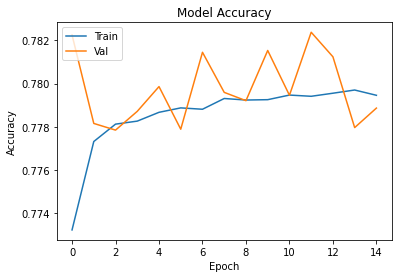

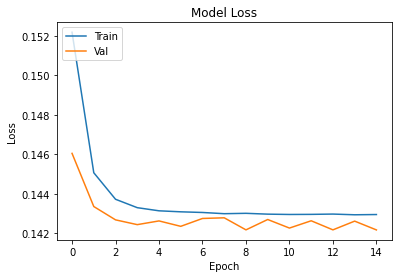

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.89%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.78%
accuracy: 82.86%
accuracy: 80.87%
accuracy: 69.87%
accuracy: 75.30%
accuracy: 64.95%
accuracy: 74.15%
accuracy: 80.39%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.83%
accuracy: 71.57%
accuracy: 63.05%
accuracy: 44.87%
accuracy: 61.56%
accuracy: 41.64%
accuracy: 55.77%
accuracy: 62.45%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 479433 samples, validate on 119859 samples
Epoch 1/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1731 - accuracy: 0.7693 - val_loss: 0.1613 - val_accuracy: 0.7708
Epoch 2/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1558 - accuracy: 0.7693 - val_loss: 0.1528 - val_accuracy: 0.7708
Epoch 3/15
479433/479433 [==============================] - 18s 38us/step - loss: 0.1529 - accuracy: 0.7698 - val_loss: 0.1523 - val_accuracy: 0.7739
Epoch 4/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1526 - accuracy: 0.7725 - val_loss: 0.1519 - val_accuracy: 0.7732
Epoch 5/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1525 - accuracy: 0.7729 - val_loss: 0.1519 - val_accuracy: 0.7732
Epoch 6/15
479433/479433 [==============================] - 17s 36us/step - loss: 0.1524 - accuracy: 0.7732 - val_loss: 0.1517 - val_accuracy: 0.7756
Epoch 7/15
479433/479433 [======================

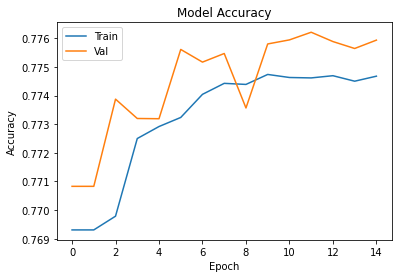

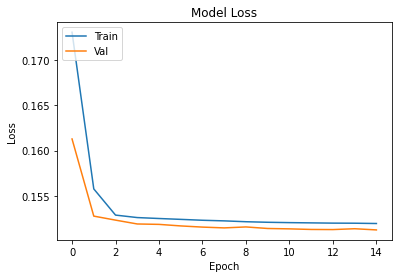

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.38%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.46%
accuracy: 97.50%
accuracy: 95.98%
accuracy: 99.25%
accuracy: 97.57%
accuracy: 99.38%
accuracy: 97.85%
accuracy: 98.47%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.74%
accuracy: 94.79%
accuracy: 91.00%
accuracy: 98.03%
accuracy: 95.12%
accuracy: 98.50%
accuracy: 95.82%
accuracy: 96.38%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 479433 samples, validate on 119859 samples
Epoch 1/30
479433/479433 [==============================] - 18s 37us/step - loss: 0.1769 - accuracy: 0.7688 - val_loss: 0.1682 - val_accuracy: 0.7708
Epoch 2/30
479433/479433 [==============================] - 18s 37us/step - loss: 0.1595 - accuracy: 0.7693 - val_loss: 0.1535 - val_accuracy: 0.7708
Epoch 3/30
479433/479433 [==============================] - 18s 37us/step - loss: 0.1529 - accuracy: 0.7702 - val_loss: 0.1513 - val_accuracy: 0.7750
Epoch 4/30
479433/479433 [==============================] - 18s 37us/step - loss: 0.1514 - accuracy: 0.7733 - val_loss: 0.1502 - val_accuracy: 0.7745
Epoch 5/30
479433/479433 [==============================] - 19s 39us/step - loss: 0.1498 - accuracy: 0.7732 - val_loss: 0.1482 - val_accuracy: 0.7748
Epoch 6/30
479433/479433 [==============================] - 18s 38us/step - loss: 0.1472 - accuracy: 0.7751 - val_loss: 0.1452 - val_accuracy: 0.7780
Epoch 7/30
479433/479433 [======================

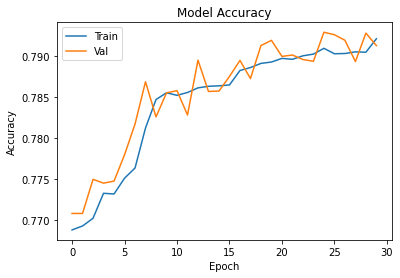

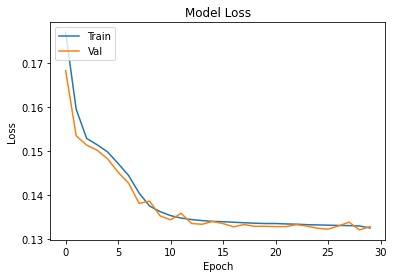

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.07%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.29%
accuracy: 78.31%
accuracy: 75.30%
accuracy: 69.84%
accuracy: 74.51%
accuracy: 68.68%
accuracy: 68.42%
accuracy: 78.12%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 46.71%
accuracy: 64.26%
accuracy: 56.24%
accuracy: 46.35%
accuracy: 59.60%
accuracy: 44.14%
accuracy: 50.30%
accuracy: 61.93%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 479433 samples, validate on 119859 samples
Epoch 1/50
479433/479433 [==============================] - 33s 68us/step - loss: 0.1361 - accuracy: 0.7871 - val_loss: 0.1259 - val_accuracy: 0.8003
Epoch 2/50
479433/479433 [==============================] - 32s 68us/step - loss: 0.1276 - accuracy: 0.8014 - val_loss: 0.1236 - val_accuracy: 0.8052
Epoch 3/50
479433/479433 [==============================] - 32s 67us/step - loss: 0.1247 - accuracy: 0.8066 - val_loss: 0.1190 - val_accuracy: 0.8201
Epoch 4/50
479433/479433 [==============================] - 31s 65us/step - loss: 0.1232 - accuracy: 0.8098 - val_loss: 0.1183 - val_accuracy: 0.8227
Epoch 5/50
479433/479433 [==============================] - 32s 66us/step - loss: 0.1220 - accuracy: 0.8120 - val_loss: 0.1165 - val_accuracy: 0.8227
Epoch 6/50
479433/479433 [==============================] - 31s 65us/step - loss: 0.1213 - accuracy: 0.8132 - val_loss: 0.1202 - val_accuracy: 0.8141
Epoch 7/50
479433/479433 [======================

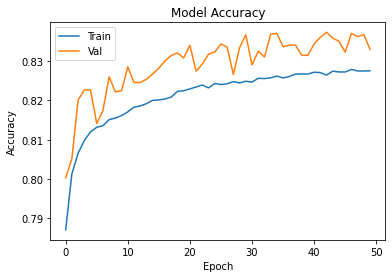

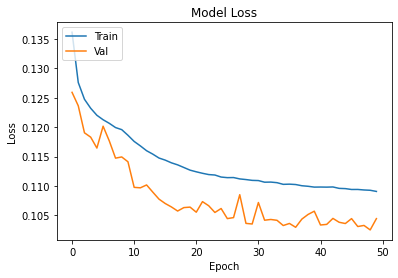

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.46%
accuracy: 92.34%
accuracy: 93.76%
accuracy: 96.67%
accuracy: 93.13%
accuracy: 96.78%
accuracy: 92.64%
accuracy: 93.98%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.04%
accuracy: 86.72%
accuracy: 89.59%
accuracy: 94.55%
accuracy: 88.33%
accuracy: 94.32%
accuracy: 87.60%
accuracy: 89.63%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 479433 samples, validate on 119859 samples
Epoch 1/50
479433/479433 [==============================] - 35s 72us/step - loss: 0.1391 - accuracy: 0.7829 - val_loss: 0.1308 - val_accuracy: 0.7961
Epoch 2/50
479433/479433 [==============================] - 35s 73us/step - loss: 0.1301 - accuracy: 0.7969 - val_loss: 0.1215 - val_accuracy: 0.8145
Epoch 3/50
479433/479433 [==============================] - 36s 74us/step - loss: 0.1277 - accuracy: 0.8014 - val_loss: 0.1205 - val_accuracy: 0.8156
Epoch 4/50
479433/479433 [==============================] - 35s 73us/step - loss: 0.1263 - accuracy: 0.8035 - val_loss: 0.1182 - val_accuracy: 0.8185
Epoch 5/50
479433/479433 [==============================] - 35s 72us/step - loss: 0.1253 - accuracy: 0.8053 - val_loss: 0.1176 - val_accuracy: 0.8190
Epoch 6/50
479433/479433 [==============================] - 35s 73us/step - loss: 0.1247 - accuracy: 0.8067 - val_loss: 0.1196 - val_accuracy: 0.8193
Epoch 7/50
479433/479433 [======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.76%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X7, test_Y7, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.76%
accuracy: 92.34%
accuracy: 91.75%
accuracy: 95.50%
accuracy: 91.59%
accuracy: 95.18%
accuracy: 91.11%
accuracy: 93.34%


In [0]:
scores = model.evaluate(test_X8, test_Y8, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X9, test_Y9, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X10, test_Y10, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X11, test_Y11, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X12, test_Y12, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X13, test_Y13, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X14, test_Y14, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X15, test_Y15, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.50%
accuracy: 86.37%
accuracy: 83.74%
accuracy: 92.04%
accuracy: 84.46%
accuracy: 91.73%
accuracy: 84.21%
accuracy: 88.43%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.74649419648519
Test Prediction Score 92.96774882528834


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.05681026763506
Test Prediction Score 85.38472606353216
Test Prediction Score 85.76493899259569
Test Prediction Score 87.66044304193747
Test Prediction Score 85.4176012228148
Test Prediction Score 85.56490795866694
Test Prediction Score 85.53155689856466
Test Prediction Score 89.93264949557572


In [0]:
y_pred_dt_test= dt.predict(test_X8)
dt_score_test = accuracy_score(test_Y8,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X9)
dt_score_test = accuracy_score(test_Y9,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X10)
dt_score_test = accuracy_score(test_Y10,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X11)
dt_score_test = accuracy_score(test_Y11,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X12)
dt_score_test = accuracy_score(test_Y12,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X13)
dt_score_test = accuracy_score(test_Y13,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X14)
dt_score_test = accuracy_score(test_Y14,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X15)
dt_score_test = accuracy_score(test_Y15,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 70.01333333333334
Test Prediction Score 80.44
Test Prediction Score 79.85333333333332
Test Prediction Score 81.16
Test Prediction Score 79.43
Test Prediction Score 76.44666666666666
Test Prediction Score 79.94
Test Prediction Score 85.56


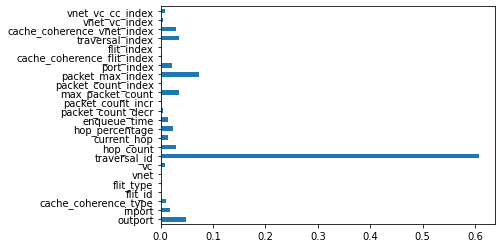

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

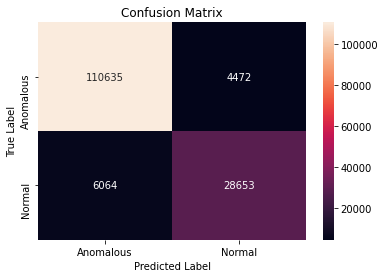

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95    115107
           1       0.86      0.83      0.84     34717

    accuracy                           0.93    149824
   macro avg       0.91      0.89      0.90    149824
weighted avg       0.93      0.93      0.93    149824



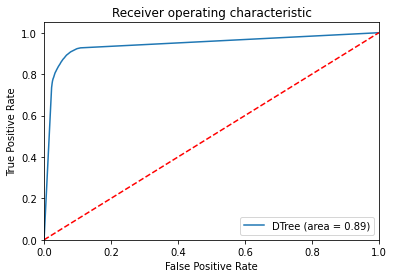

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.62154008396574
Test Prediction Score 94.063701409654


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X7)
rf_score_test = accuracy_score(test_Y7,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 80.79395085066162
Test Prediction Score 87.20723889306326
Test Prediction Score 87.12363869314542
Test Prediction Score 89.50749464668094
Test Prediction Score 87.1853660967951
Test Prediction Score 87.45637446109629
Test Prediction Score 87.30513014216056
Test Prediction Score 91.92357549456123


In [0]:
y_pred_rf_test= rf.predict(test_X8)
rf_score_test = accuracy_score(test_Y8,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X9)
rf_score_test = accuracy_score(test_Y9,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X10)
rf_score_test = accuracy_score(test_Y10,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X11)
rf_score_test = accuracy_score(test_Y11,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X12)
rf_score_test = accuracy_score(test_Y12,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X13)
rf_score_test = accuracy_score(test_Y13,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X14)
rf_score_test = accuracy_score(test_Y14,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X15)
rf_score_test = accuracy_score(test_Y15,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 72.61666666666666
Test Prediction Score 82.31333333333333
Test Prediction Score 81.65666666666667
Test Prediction Score 83.81
Test Prediction Score 81.97
Test Prediction Score 78.43333333333334
Test Prediction Score 82.81333333333333
Test Prediction Score 88.0


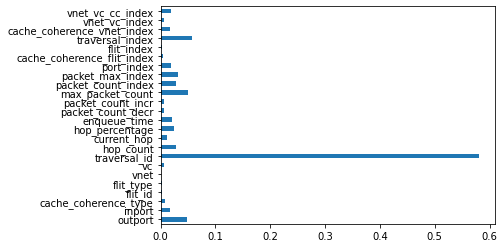

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

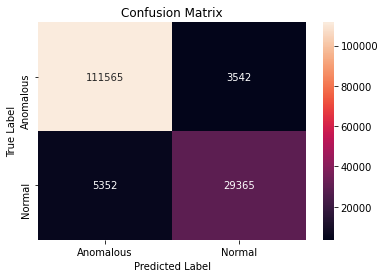

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    115107
           1       0.89      0.85      0.87     34717

    accuracy                           0.94    149824
   macro avg       0.92      0.91      0.92    149824
weighted avg       0.94      0.94      0.94    149824



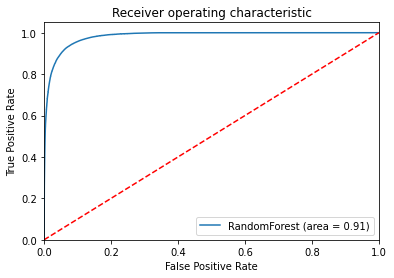

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.22975778084808
Test Prediction Score 95.40861277231953


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.93125062182868
Test Prediction Score 87.42466147623539
Test Prediction Score 90.5308165606424
Test Prediction Score 91.8203789273326
Test Prediction Score 89.62601139743143
Test Prediction Score 90.11017587079996
Test Prediction Score 90.48142297919098
Test Prediction Score 94.33438539142197


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X8)
xgbc_score_test = accuracy_score(test_Y8,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X9)
xgbc_score_test = accuracy_score(test_Y9,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X10)
xgbc_score_test = accuracy_score(test_Y10,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X11)
xgbc_score_test = accuracy_score(test_Y11,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X12)
xgbc_score_test = accuracy_score(test_Y12,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X13)
xgbc_score_test = accuracy_score(test_Y13,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X14)
xgbc_score_test = accuracy_score(test_Y14,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X15)
xgbc_score_test = accuracy_score(test_Y15,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 72.88666666666667
Test Prediction Score 82.82666666666667
Test Prediction Score 86.99
Test Prediction Score 87.21333333333334
Test Prediction Score 85.28666666666666
Test Prediction Score 82.69
Test Prediction Score 86.55000000000001
Test Prediction Score 92.04666666666667


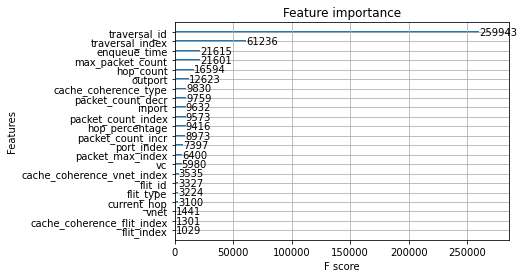

In [0]:
plot_importance(xgbc)
plt.show()

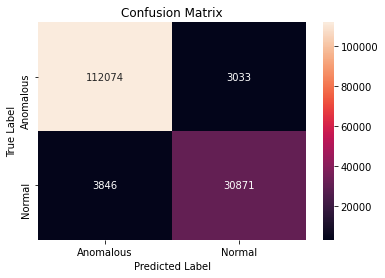

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    115107
           1       0.91      0.89      0.90     34717

    accuracy                           0.95    149824
   macro avg       0.94      0.93      0.93    149824
weighted avg       0.95      0.95      0.95    149824



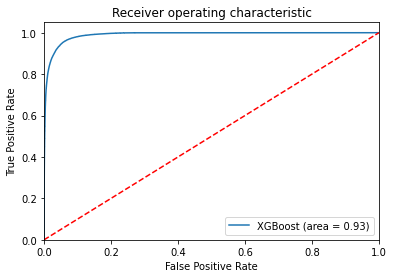

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.23261448509241
Test Prediction Score 87.53737718923537


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X7)
gbm_score_test = accuracy_score(test_Y7,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 85.7705700925281
Test Prediction Score 89.95699509200492
Test Prediction Score 92.53907006540231
Test Prediction Score 94.5277182964549
Test Prediction Score 92.14142118991843
Test Prediction Score 93.43324437145007
Test Prediction Score 93.53581484788133
Test Prediction Score 96.59724961956829


In [0]:
y_pred_gbm_test = gbm.predict(test_X8)
gbm_score_test = accuracy_score(test_Y8,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X9)
gbm_score_test = accuracy_score(test_Y9,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X10)
gbm_score_test = accuracy_score(test_Y10,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X11)
gbm_score_test = accuracy_score(test_Y11,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X12)
gbm_score_test = accuracy_score(test_Y12,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X13)
gbm_score_test = accuracy_score(test_Y13,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X14)
gbm_score_test = accuracy_score(test_Y14,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X15)
gbm_score_test = accuracy_score(test_Y15,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 78.54666666666667
Test Prediction Score 84.20666666666666
Test Prediction Score 88.58333333333334
Test Prediction Score 92.43333333333334
Test Prediction Score 88.01333333333334
Test Prediction Score 89.20333333333333
Test Prediction Score 90.42
Test Prediction Score 94.58666666666666


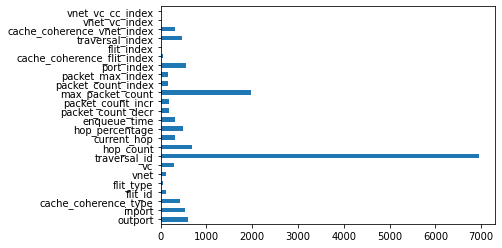

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

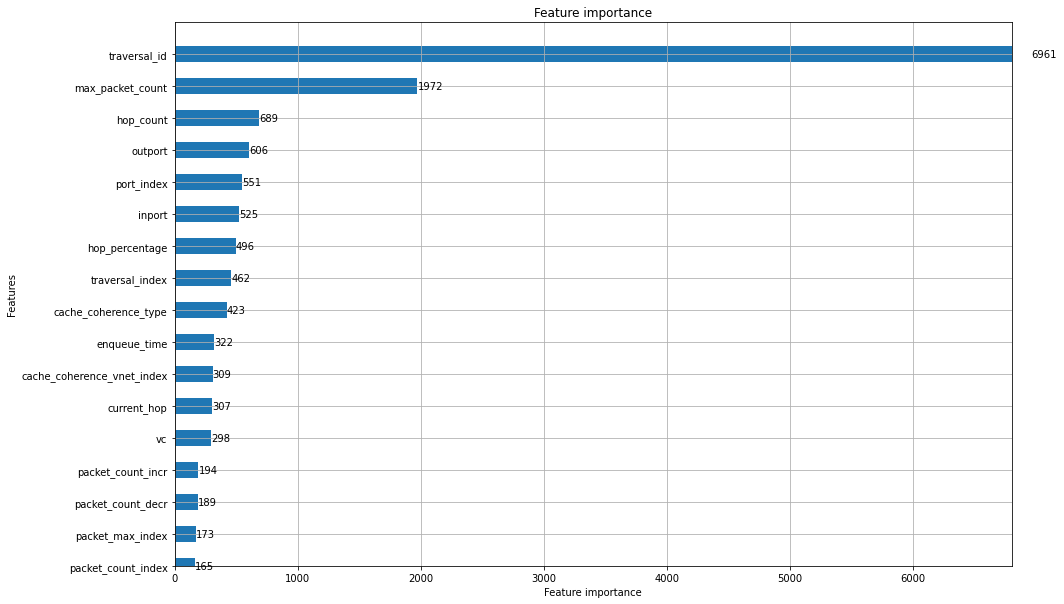

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[6961,
 1972,
 689,
 606,
 551,
 525,
 496,
 462,
 423,
 322,
 309,
 307,
 298,
 194,
 189,
 173,
 165,
 119,
 114,
 62,
 46,
 15,
 2,
 0]

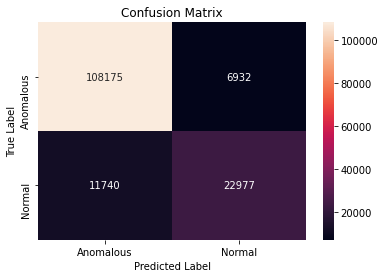

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    115107
           1       0.77      0.66      0.71     34717

    accuracy                           0.88    149824
   macro avg       0.84      0.80      0.82    149824
weighted avg       0.87      0.88      0.87    149824



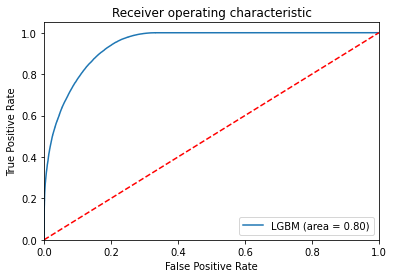

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()